## Data Visualization

In [2]:
import pandas as pd
df = pd.read_csv("cpi_full_dataset.csv")

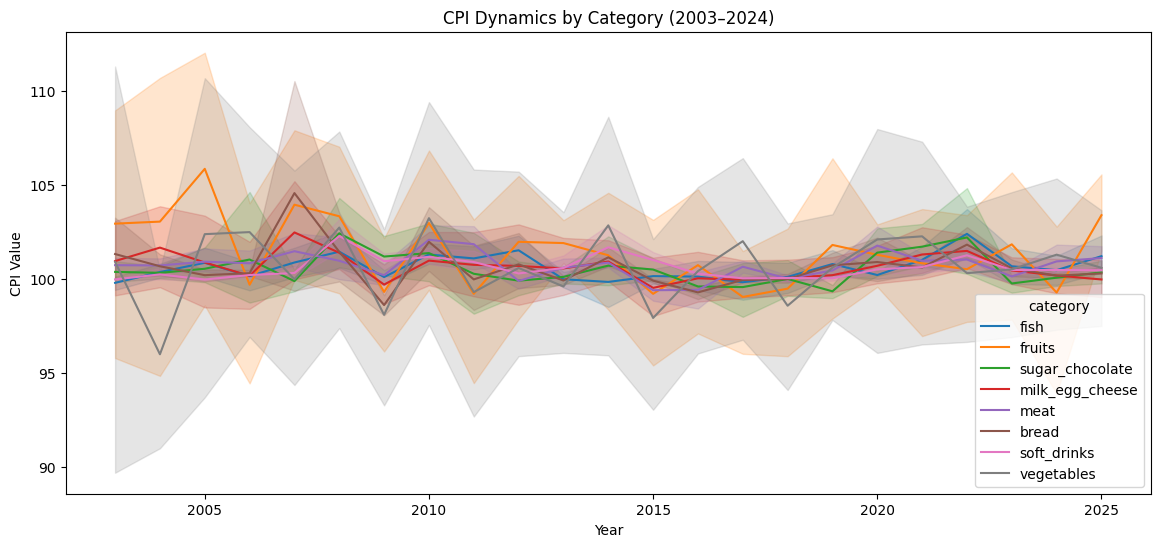

In [24]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x="year", y="value", hue="category")
plt.title("CPI Dynamics by Category (2003–2024)")
plt.xlabel("Year")
plt.ylabel("CPI Value")
plt.show()


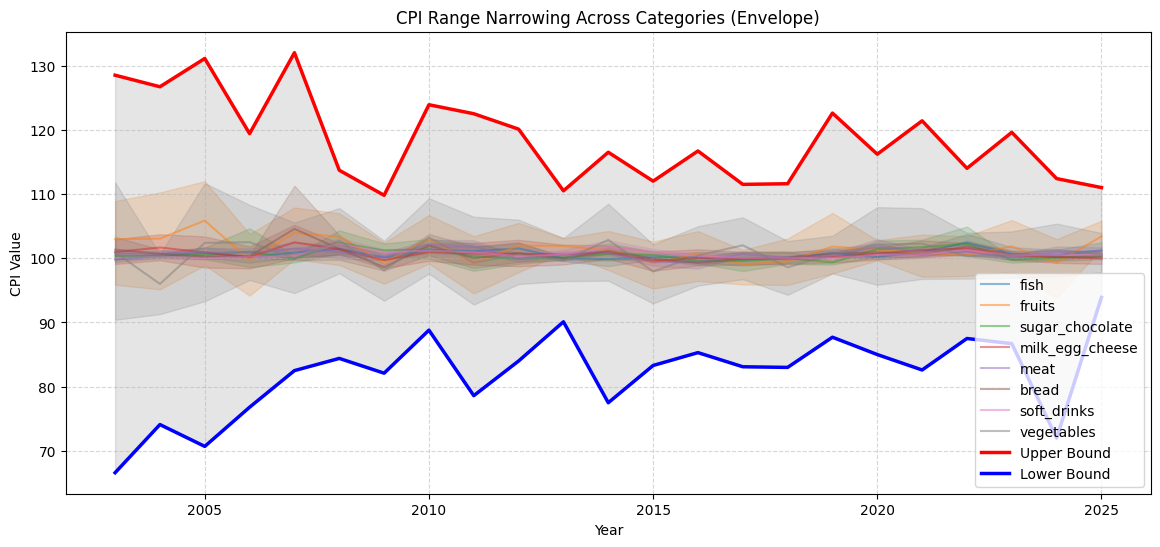

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

sns.lineplot(data=df, x="year", y="value", hue="category", alpha=0.5)

# Upper boundary 
upper = df.groupby("year")["value"].max()
plt.plot(upper.index, upper.values, color="red", linewidth=2.5, label="Upper Bound")

# Lower boundary 
lower = df.groupby("year")["value"].min()
plt.plot(lower.index, lower.values, color="blue", linewidth=2.5, label="Lower Bound")

plt.fill_between(upper.index, lower.values, upper.values, color="gray", alpha=0.2)

plt.title("CPI Range Narrowing Across Categories (Envelope)")
plt.xlabel("Year")
plt.ylabel("CPI Value")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


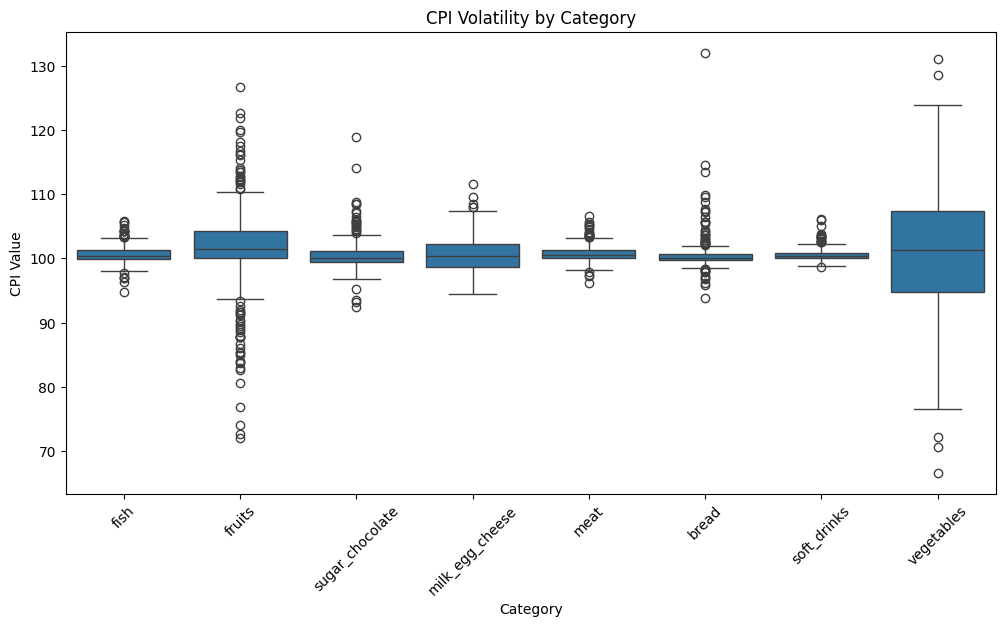

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="category", y="value")
plt.title("CPI Volatility by Category")
plt.xlabel("Category")
plt.ylabel("CPI Value")
plt.xticks(rotation=45)
plt.show()


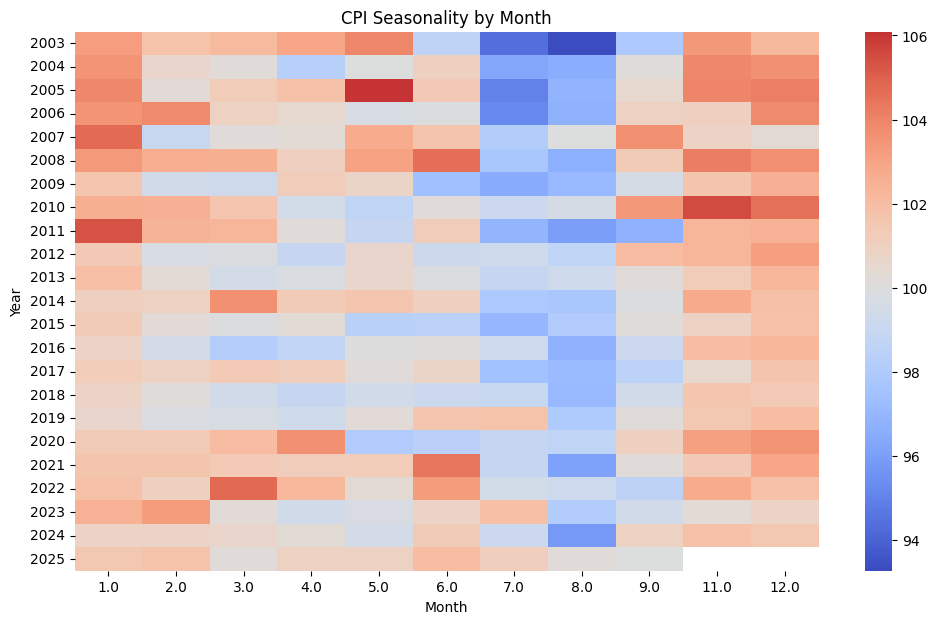

In [26]:
month_map = {
    "янв": 1,
    "фев": 2,
    "мар": 3,
    "апр": 4,
    "май": 5,
    "июн": 6,
    "июл": 7,
    "авг": 8,
    "сен": 9,
    "oct": 10,
    "ноя": 11,
    "дек": 12
}

df["month_num"] = df["month"].map(month_map)

pivot = df.pivot_table(index="year", columns="month_num", values="value", aggfunc="mean")

plt.figure(figsize=(12,7))
sns.heatmap(pivot, cmap="coolwarm", center=100)
plt.title("CPI Seasonality by Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


In [12]:
df.head()

,year,month,value,category,month_num
0,2003,янв,100.6,fish,1
1,2003,фев,98.2,fish,2
2,2003,мар,100.4,fish,3
3,2003,апр,100.3,fish,4
4,2003,май,99.5,fish,5


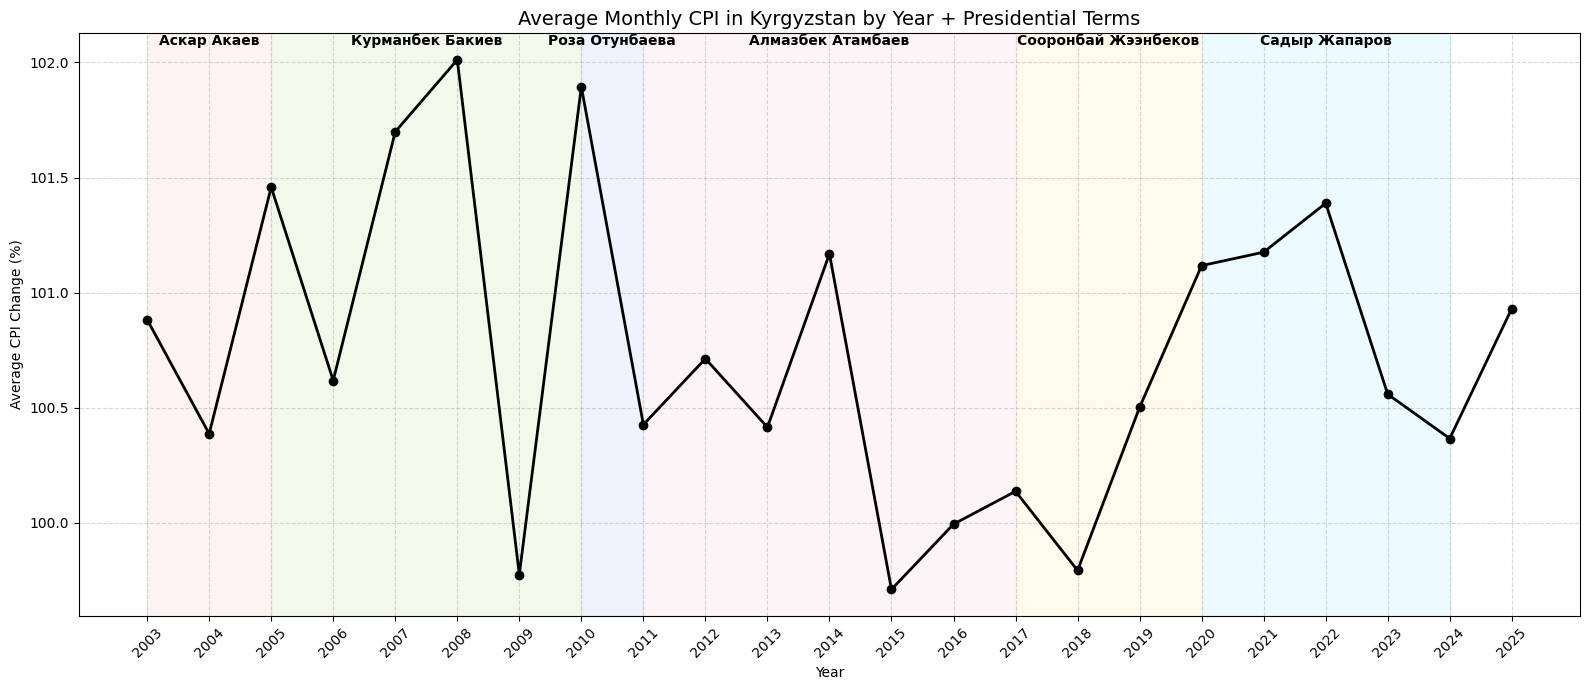

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cpi_full_dataset.csv")

yearly = df.groupby("year")["value"].mean()

presidents = [
    ("Аскар Акаев", 2003, 2005),
    ("Курманбек Бакиев", 2005, 2010),
    ("Роза Отунбаева", 2010, 2011),
    ("Алмазбек Атамбаев", 2011, 2017),
    ("Сооронбай Жээнбеков", 2017, 2020),
    ("Садыр Жапаров", 2020, 2024)
]

plt.figure(figsize=(16, 7))

plt.plot(yearly.index, yearly.values, marker='o', linewidth=2, color="black", label="Average Monthly CPI")

colors = ["#fde2e2", "#e2f0cb", "#d7e3fc", "#fce4ec", "#fff3cd", "#d1f7ff"]

for (name, start, end), color in zip(presidents, colors):
    plt.axvspan(start, end, color=color, alpha=0.4)
    plt.text((start + end) / 2, max(yearly.values) + 0.05,
             name,
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Average Monthly CPI in Kyrgyzstan by Year + Presidential Terms", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average CPI Change (%)")
plt.xticks(yearly.index, rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


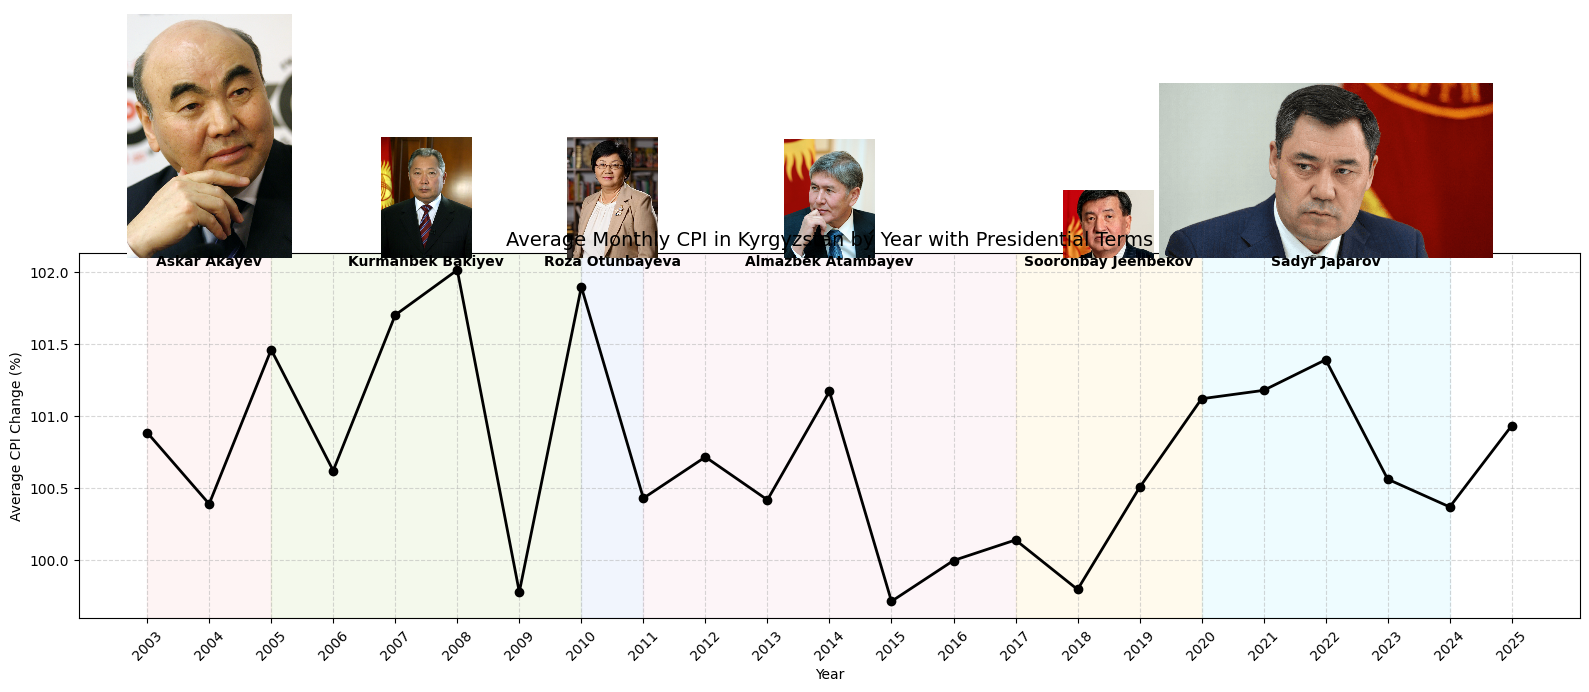

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

df = pd.read_csv("cpi_full_dataset.csv")

yearly = df.groupby("year")["value"].mean()

presidents = [
    ("Askar Akayev", 2003, 2005, "Akaev.png"),
    ("Kurmanbek Bakiyev", 2005, 2010, "Bakiev.png"),
    ("Roza Otunbayeva", 2010, 2011, "Otunbaeva.png"),
    ("Almazbek Atambayev", 2011, 2017, "Atambaev.png"),
    ("Sooronbay Jeenbekov", 2017, 2020, "Jeenbekov.png"),
    ("Sadyr Japarov", 2020, 2024, "Japarov.png")
]

colors = ["#fde2e2", "#e2f0cb", "#d7e3fc", "#fce4ec", "#fff3cd", "#d1f7ff"]


plt.figure(figsize=(16,7))


plt.plot(yearly.index, yearly.values, marker='o', linewidth=2, color="black", label="Average Monthly CPI")


for (name, start, end, img_file), color in zip(presidents, colors):

    plt.axvspan(start, end, color=color, alpha=0.35)

    try:
        img = mpimg.imread(img_file)
        imagebox = OffsetImage(img, zoom=0.20)
        ab = AnnotationBbox(
            imagebox,
            ((start + end) / 2, max(yearly.values) + 0.08),
            frameon=False,
            box_alignment=(0.5, 0)
        )
        plt.gca().add_artist(ab)
    except FileNotFoundError:
        print(f"⚠ Image not found: {img_file}")

    plt.text(
        (start + end) / 2,
        max(yearly.values) + 0.03,
        name,
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Average Monthly CPI in Kyrgyzstan by Year with Presidential Terms", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average CPI Change (%)")
plt.xticks(yearly.index, rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()
